In [366]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [353]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [354]:
print(type(response))
response.content

<class 'requests.models.Response'>


b'<!DOCTYPE html>\n<html lang="en-US">\n<head>\t\n<!-- Google Tag Manager -->\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\n\'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n\n})(window,document,\'script\',\'dataLayer\',\'GTM-TVMMMDC\');</script>\n\n<!-- End Google Tag Manager -->\n<meta charset="UTF-8" />\n<meta name=\'viewport\' content=\'width=device-width, initial-scale=1.0\' />\n<meta http-equiv=\'X-UA-Compatible\' content=\'IE=edge\' />\n<link rel="profile" href="https://gmpg.org/xfn/11" />\n<link rel="pingback" href="https://countrymusichalloffame.org/wp/xmlrpc.php" />\n<!--[if lt IE 9]>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>\n\t<script src="https://countrymusichalloffame.org/content/themes/bb-them

In [355]:
HOF = BeautifulSoup(response.content, 'lxml')
print(HOF.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [356]:
print(HOF)

<!DOCTYPE html>
<html lang="en-US">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':

new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],

j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=

'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);

})(window,document,'script','dataLayer','GTM-TVMMMDC');</script>
<!-- End Google Tag Manager -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="https://gmpg.org/xfn/11" rel="profile"/>
<link href="https://countrymusichalloffame.org/wp/xmlrpc.php" rel="pingback"/>
<!--[if lt IE 9]>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/html5shiv.js"></script>
	<script src="https://countrymusichalloffame.org/content/themes/bb-theme/js/respond.min.js"></script>
<![endif]-->
<title>Hall of Fam

In [357]:
names = HOF.find_all('div', attrs = {'class': 'vertical-card_content--title'})
print(names)

[<div class="vertical-card_content--title">
<h3>Roy Acuff</h3>
</div>, <div class="vertical-card_content--title">
<h3>Alabama</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bill Anderson</h3>
</div>, <div class="vertical-card_content--title">
<h3>Eddy Arnold</h3>
</div>, <div class="vertical-card_content--title">
<h3>Chet Atkins</h3>
</div>, <div class="vertical-card_content--title">
<h3>Gene Autry</h3>
</div>, <div class="vertical-card_content--title">
<h3>DeFord Bailey</h3>
</div>, <div class="vertical-card_content--title">
<h3>Bobby Bare</h3>
</div>, <div class="vertical-card_content--title">
<h3>Johnny Bond</h3>
</div>]


In [358]:
years = HOF.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
print(years)

[<div class="vertical-card_content--copy">
<p>
                    Inducted 1962                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2005                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2001                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1966                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1973                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1969                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2005                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 2013                  </p>
</div>, <div class="vertical-card_content--copy">
<p>
                    Inducted 1999                  </p>
</div>]


In [359]:
artists = []
for i in range(len(names)):
    name = names[i].get_text().replace("\n", "").strip()
    artists.append(name)
print(artists)



['Roy Acuff', 'Alabama', 'Bill Anderson', 'Eddy Arnold', 'Chet Atkins', 'Gene Autry', 'DeFord Bailey', 'Bobby Bare', 'Johnny Bond']


In [360]:
inducted = []
for i in range(len(years)):
    year = years[i].get_text().replace("\n", "").strip()
    inducted.append(year)
print(inducted)


['Inducted 1962', 'Inducted 2005', 'Inducted 2001', 'Inducted 1966', 'Inducted 1973', 'Inducted 1969', 'Inducted 2005', 'Inducted 2013', 'Inducted 1999']


In [361]:
both = pd.DataFrame([artists,inducted]).T
both.columns=['Name','Inducted']
both['Inducted'] = both['Inducted'].str.strip('Inducted')
both

,Name,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


In [371]:

url_temp = 'https://countrymusichalloffame.org/hall-of-fame/members/page/{}'
artists = []
inducted = []
for page in range(1,17):
    w_url = url_temp.format(page)
    response = requests.get(w_url)
    page_html = BeautifulSoup(response.content, 'lxml')
    n = names.find_all('div', attrs = {'class': 'vertical-card_content--title'})
    y = years.find_all('div', attrs = {'class': 'vertical-card_content--copy'})
    for i in range(len(names)):
        name = n[i].get_text().replace("\n", "")
        artists.append(name)
    for i in range(len(years)):
        ind = y[i].get_text().replace("\n", "").strip()
        year = re.sub("[^0-9]", "", ind)
        inducted.append(year)
        
print(artists)
print(inducted)
#THIS CODE REQUIRES IMPORT RE AT THE VERY BEGINNING

# url = 'https://countrymusichalloffame.org/hall-of-fame/members/page/'
# final_df = pd.DataFrame()

# for page in range(1,17):


#     r = requests.get(url + str(page))

#     soup = BeautifulSoup(r.content, "lxml")

#     result_list=[]
#     for artist in soup.find_all("h3"):
#         #print(link.text)
#         result_list.append(artist.text)
        
#     x = [element.text for element in soup.find_all("div", "vertical-card_content--copy")]
#     year = []
#     for element in x:
#         year.append(element.strip())
        
#     b=[]
#     for i in year:
#         b+=i.split(" ")
       
#     b=b[1::2]

#     dict={'Name':result_list,'Inducted':b}
#     df= pd.DataFrame(dict)
#     final_df = final_df.append(df)



AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [363]:
#find a total of all artist in the HOF 
final_df

,Name,Inducted
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
0,Hank Williams,1961
1,Bob Wills,1968
2,Mac Wiseman,2014
3,Tammy Wynette,1998


In [364]:
len(final_df.index)

140

(array([0., 0., 0., 0., 0., 0.]),
 array([1960, 1970, 1980, 1990, 2000, 2010, 2020]),
 <BarContainer object of 6 artists>)

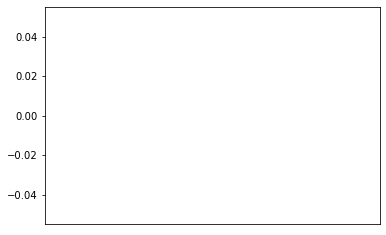

In [365]:
plt.hist(final_df.Inducted, bins = [1960, 1970, 1980, 1990, 2000, 2010, 2020])